In [5]:
%matplotlib qt

# Introduction to Matplotlib

## $ \S 1 $ About Matplotlib

__Matplotlib__ is a powerful and versatile plotting library for Python.
It was initially developed by in the early 2000s and has since become a widely
used tool in the Python ecosystem.  Matplotlib can be used to generate several
kinds of visualizations, such as 2D and 3D graphs, scatter plots, histograms,
bar plots, animations and more.  Moreover, it supports various output formats
and is well integrated with other popular Python libraries such as _NumPy_,
_SciPy_ or _pandas_.  Its ease of use and extensive customizability allow users
to create visually appealing and informative graphics that facilitate the
communication of complex data and insights.  Matplotlib is used across various
domains, such as data science, machine learning, artificial intelligence,
finance and academia, for tasks such as data exploration, model evaluation and
result presentation. 

⚡ `%matplotlib qt` is a magic command that sets the backend for displaying
plots in Jupyter notebooks to the Qt5 framework. This causes plots to
be displayed in a separate window, so that the user can interact with them by
zomming or panning. It is especially useful when working with large or complex
datasets, or when one needs more advanced plot interaction features. To switch
back to displaying plots inline within the notebook, you can use the
`%matplotlib inline` magic command.

## $ \S 2 $ Drawing the graph of functions of one variable

Suppose we would like to visualize the graph of a real function $ f $, say:
$$
    f(x) = \sin(x)\,.
$$
We begin by importing _NumPy_ and the __Pyplot__ submodule of _Matplotlib_
and defining $ f $.

📝 Even though one can import these modules under any name, it is widespread
practice in the Python community to use the aliases `np` for `numpy` and `plt`
for `matplotlib.pyplot`. Also, it is common to separate the `import`
statements from the surrounding code by two blank lines. However, the important
thing is to be consistent within your own codebase.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x: np.sin(x)

We now need to generate an array of $ x $ values inside the domain to be
plotted, say, the interval $ [-2\pi, 2\pi] $, and to compute the corresponding
$ y = f(x) $ values for each $ x $ in this array.

We can use NumPy's `linspace` function to create an array of evenly spaced
values to solve the first task. The syntax is
`numpy.linspace(start, stop, num=50)` (in addition to some other optional
arguments which will be ignored). Here:
* `start` is the starting value of the array.
* `stop` is the end value of the array.
* `num` (default $ = 50 $) is the number of evenly spaced values to be generated within the interval.

__Example:__

In [2]:
xs = np.linspace(0, 1, 11)     # Generate 11 evenly spaced points in [0, 1].
print(xs)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In our case, we will let $ x $ range over the interval $ [-2\pi, 2\pi] $, hence we set:

In [3]:
xs = np.linspace(-2 * np.pi, 2 * np.pi, 201)
ys = f(xs)

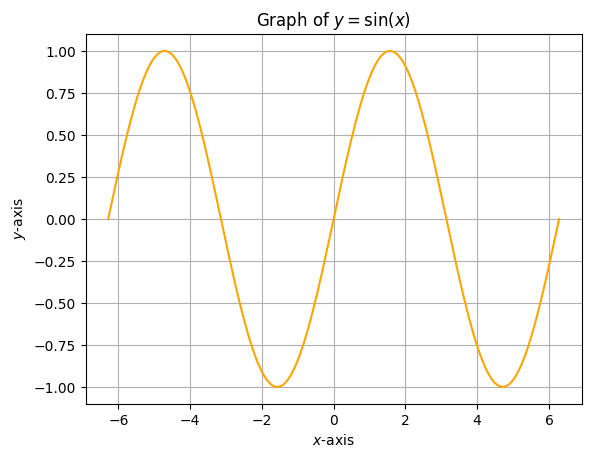

In [4]:
# Recall that 'plt' is the name under which matplotlib.pyplot was imported.

# Generate a plot using all pairs (x, y) for x in `xs` and y in `ys`:
plt.plot(xs, ys, linestyle="solid", color="orange") 
plt.xlabel("$ x $-axis")    # Label the x-axis (optional).
plt.ylabel("$ y $-axis")    # Label the y-axis (optional).
plt.title("Graph of $ y = \sin(x) $")     # Choose a title (optional).
plt.grid(True)              # Add a rectangular grid as background (optional).
plt.show()                  # Display the resulting diagram.

You can replace the sine function with any other real function of one variable
and follow the same steps to draw its graph.

📝 The arrays `xs` and `ys` must have exactly the same length; in our case,
since `ys` was defined as consisting of all values of the form $ f(x) $ for $ x
$ in `xs`, this is automatically true. The graph is drawn by connecting
consecutive points $ (x, y) $ by line segments.  Thus, to obtain a smooth line,
it is important that the length of `xs` and `ys` be sufficiently large.

__Exercise:__ Investigate what happens if you lower the number of points
in `xs` to $ 10 $ in our example.

📝 Note that the statement `plt.plot(xs, ys)` only creates the line plot, but
does not cause it to be displayed. The `plt.show()` function is the one
responsible for opening a window, rendering the graph, and displaying it to the
user. It also starts the event loop that allows for interaction with the plot,
such as zooming or panning.  However, when using Matplotlib in an interactive
environment such as a Jupyter Notebook, the graph might still be displayed
without calling `plt.show()`, because these environments are configured to
automatically render the plots inline. In such cases, you may see the plot
immediately after executing `plt.plot(xs, ys)`. 

__Exercise (drawing and customizing graphs of functions of one variable):__ Use
Matplotlib to visualize the graphs of:

(a) The function $ f(x) = x^3 - 3x^2 - 9x + 6 $ over the interval $ [-4, 6] $;
with the line style set to `dotted` and the color to `red`; labelling the
$ x $-axis by '$ x $' and the $ y $-axis by '$ f(x) $'; displaying a rectangular
grid in the background; setting the plot title to "Cubical function:
$ f(x) = x^3 - 3x^2 - 9x + 6 $".

(b) The function $ g(x) = \sin(x)\exp(-0.1\, x) $ over the interval
$ [0, 100] $; with the line style set to `solid`, the color to `green` and
the `linewidth` to $ 1 $; labelling the $ x $-axis by '$ x $' and the $ y $-axis
by '$ y = f(x) $'; displaying a rectangular grid in the background; setting the
plot title to "Damped oscillation: $ g(x) = \sin(x)\,\exp(-0.1\,x) $". 

(c) The function $ h(x) = \log x $ over the interval $ x \in [0.1, 10] $ for
$ y $ in $ [-2, 2.5] $; with the line style set to `dashed` and the color to
`blue`; labelling the $ x $-axis by "$ x $-axis" and the $ y $-axis by "$ y
$-axis"; _not_ displaying a rectangular grid in the background; setting the plot
title to "Graph of the logarithmic function $ y = \log x $". To set the limits
of the $ x $- and $ y $-axes to be displayed, use `plt.xlim(0.1, 10)` and
similarly for $ y $.

## $ \S 3 $ Drawing the graphs of two or more functions in a single diagram

To create a plot of the graphs of two or more functions of one variable using
Matplotlib, we can simply call `plt.plot()` multiple times before calling
`plt.show()`. Each call to `plt.plot()` adds a new line to the plot.
Additionally, we can individually customize the appearance of each graph and add
a legend to the plot for better readability.

__Example:__ Plot the graphs of the following functions over the interval $ [-3, 3] $:
$$
f(x) = \frac{x^3\cos x}{10} + 2x^2 \sin x - 1 \quad \text{and} \quad g(x) = x^2\sin(2x) + 3x - 2\,.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos


f = lambda x: x**3 * cos(x) / 10 + 2 * x**2 * sin(x) - 1
g = lambda x: x**2 * sin(2 * x) + 3 * x - 2

Now we need to generate an array containing the $ x $-coordinates of the points
to be displayed.  As before, this can easily be done with the help of
`numpy.linspace`. Further, we need to generate two independent arrays `ys_f` and
`ys_g` containing the corresponding $ y $-coordinates of points on the graphs of
$ f $ and $ g $:

In [2]:
xs = np.linspace(-3, 3, 201)
ys_f = f(xs)
ys_g = g(xs)

📝 One can also draw the graph of the first function over an interval and the
graph of the second function over another interval by creating two separate
arrays to hold the corresponding values of $ x $.

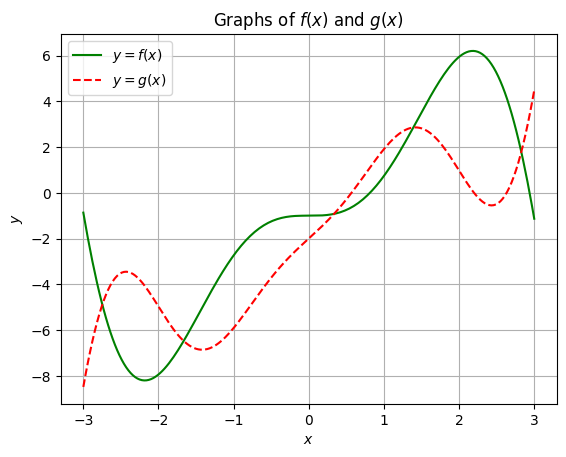

In [3]:
# Creating the plot of the graphs of f and g:
plt.plot(xs, ys_f, label="$ y = f(x) $", color="green", linestyle="-") 
plt.plot(xs, ys_g, label="$ y = g(x) $", color="red", linestyle="--")
# Let's now customize the plot by adding labels, a title, a grid, and a legend:
plt.xlabel("$ x $")    # Labeling the x-axis.
plt.ylabel("$ y $")    # Labeling the y-axis.
plt.title("Graphs of $ f(x) $ and $ g(x) $")  # Specyifying a title.
plt.grid(True)     # Draw a rectangular grid in the background.
plt.legend()       # Add a legend to help us identify the two lines.
plt.show()         # Display the plot.


__Exercise (drawing and customizing graphs of several functions):__ In this
exercise, you will plot the graphs of multiple functions in the same diagram.
For each item, perform the following steps:

1. Create the appropriate array `xs` of $ x $-values using `numpy.linspace`.
2. Generate the corresponding array of $ y $-values for each function.
3. Plot the functions using `matplotlib.pyplot.plot`.
4. Add labels for the $ x $ and $ y $-axes, a title, and a legend.
5. Customize the `linestyle`, `label`, `color`, and `linewidth` of each
   function's plot.
6. Display the final plot using `matplotlib.pyplot.show`.

(a) 
$$
f(x) = \exp(-x^2) \quad \text{(Gaussian function)} \quad \text{and}
\quad g(x) = \frac{1}{1 - e^{-x}} \quad \text{(logistic function)}\,.
$$

(b) 
$$
f(x) = x^3 - 3x^2 + 2x, \quad g(x) = -2x^2 + 5x + 3, \quad
h(x) = x^4 - 4x^3 + 6x^2 - 4x + 1\,.
$$

(c) 
$$
f(x) = \sin(x^2),\quad g(x) = \frac{e^{-x}}{\sqrt{2 \pi x}}, \quad
h(x) = \frac{e^{ -x}}{(1 - e^{-x})^2}, \quad k(x) = \cos(x^2)\,.
$$

## $ \S 4 $ Creating dispersion (scatter) plots

A __dispersion plot__, also known as a __scatter plot__, is a graphical
representation of the relationship between two variables consisting of plots of
individual data points. Each such data point may represent an observation or a
sample, for example. Dispersion plots can help us identify trends, correlations,
or patterns in the data, and they are particularly useful for exploring the
relationships between two continuous variables.

Here's an example of how to generate a dispersion plot using Matplotlib,
involving data on the boiling and melting points of various chemical elements,
along with that of water ($ \mathrm{H_2O} $), for reference.

In [4]:
# Import Numpy and Pyplot:
import numpy as np
import matplotlib.pyplot as plt


# Data source: https://pubchem.ncbi.nlm.nih.gov/
# Creating an array to store the melting points (in Kelvin):
melting_points = np.array([
    273.15,  # Water (H2O)
    54.36,   # Helium (He)
    317.43,  # Argon (Ar)
    1156,    # Sodium (Na)
    933.47,  # Aluminum (Al)
    1811,    # Calcium (Ca)
])
# Creating an array to store the boiling points (in Kelvin):
boiling_points = np.array([
    373.15,  # Water (H2O)
    4.22,    # Helium (He)
    87.3,    # Argon (Ar)
    1156,    # Sodium (Na)
    2792,    # Aluminum (Al)
    2671,    # Calcium (Ca)
])
# Creating a list to help us identify which point corresponds to which element:
element_names = [
    "Water (H2O)",
    "Helium (He)",
    "Argon (Ar)",
    "Sodium (Na)",
    "Aluminum (Al)",
    "Calcium (Ca)",
]

To create the dispersion plot, we can use Matplotlib's `scatter` function:

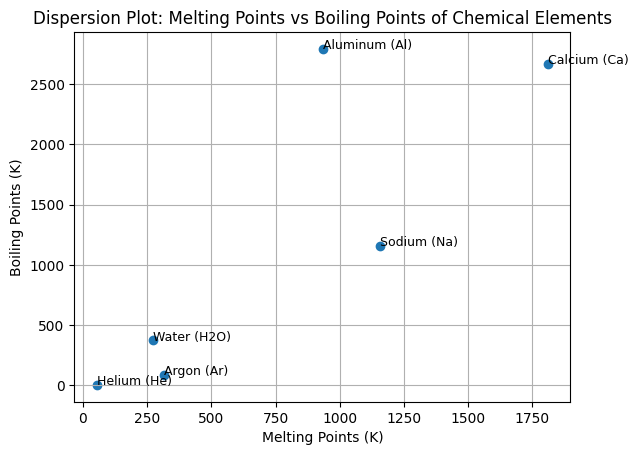

In [9]:
# Generate the plot consisting of pairs (melting, boiling) for each element:
plt.scatter(melting_points, boiling_points)
# Annotate each point to help us identify them:
for i, element in enumerate(element_names):
    plt.annotate(element, (melting_points[i], boiling_points[i]), fontsize=9)

plt.xlabel("Melting Points (K)")    # Label the x-axis.
plt.ylabel("Boiling Points (K)")    # Label the y-axis.
plt.title("Dispersion Plot: Melting Points vs Boiling Points "
          "of Chemical Elements")   # Set the title.
plt.grid(True)                      # Show a rectangular grid in the background.
plt.show()                          # Display the plot.

__Exercise:__ For this exercise, we will use the "diabetes" dataset available in
the `sklearn` library to create a scatter plot illustrating the correlation
between the Body Mass Index (BMI) and the average blood pressure of a sample
population. (Both values have been preprocessed and scaled to have a mean of 0
and a standard deviation of 1.) Complete the code in the cell below as follows:
* Create the plot using `scatter` with arguments: `alpha=0.5` (set the
  transparency); `c=avg_blood_pressure` (color according to the value
  of the blood pressure); `cmap="viridis"` (select the colormap);
  and `marker='.'` or `'^'` or `o`.
* Add labels to the $ x $ and $ y $-axes.
* Specify a title.
* Display the plot.

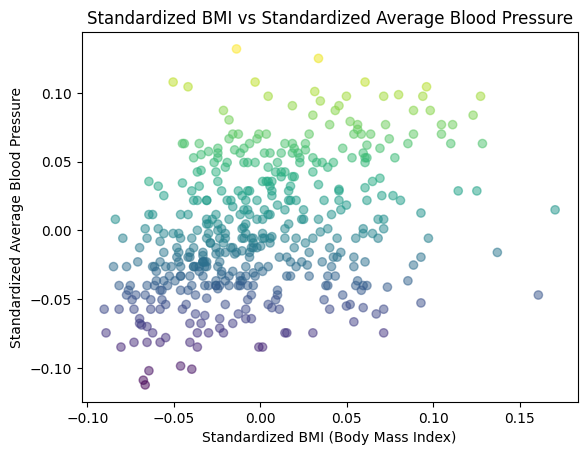

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes


# Load the diabetes dataset:
diabetes = load_diabetes()
# Extract the standardized BMI and average blood pressure values:
bmi = diabetes.data[:, diabetes.feature_names.index("bmi")]
avg_blood_pressure = diabetes.data[:, diabetes.feature_names.index("bp")]

# Create the scatter plot; add the options mentioned above:
plt.scatter(bmi, avg_blood_pressure, ...)
# Set the x-axis label to: "Standardized BMI (Body Mass Index)":

# Set the y-axis label to: "Standardized Average Blood Pressure":

# Specify the title:

# Display the plot:


## $ \S 5 $ Creating histograms

A __histogram__ is a graphical representation that displays the distribution of
a dataset by dividing it into a series of bins and counting the number of data
points that fall into each bin. It is particularly useful for visualizing the
underlying distribution of a continuous variable or for exploring the frequency
of events in discrete data.

In the following example we will generate a histogram using $ 1000 $ randomly
generated values taken from a population following a normal distribution, 
divided into $ 30 $ bins.  To plot the histogram, we use the `hist` function.

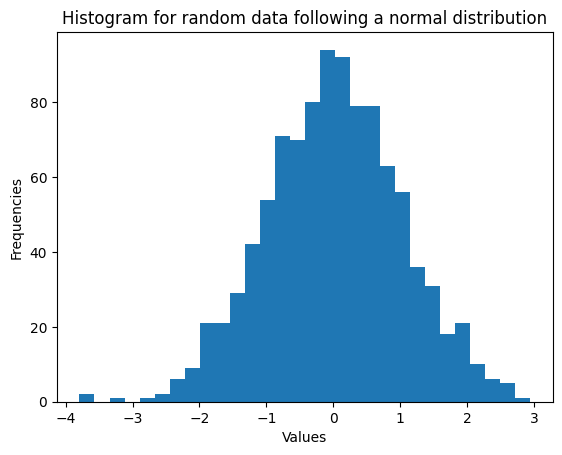

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a sample of 1000 random numbers from a normal distribution:
data = np.random.randn(1000)
# Generating the histogram with a division into 30 bins:
plt.hist(data, bins=30)
plt.xlabel("Values")         # Labeling the x-axis.
plt.ylabel("Frequencies")    # Labeling the y-axis.
# Setting the title:
plt.title("Histogram for random data following a normal distribution")
plt.show()    # Display the plot.

__Example:__ In this example we will plot the petal length distribution for a
sample of three species of Iris flowers: Setosa, Versicolor, and Virginica. The
dataset will be loaded from another popular Python module called _Seaborn_.
However, to generate the histogram itself we only need to use Matplotlib.

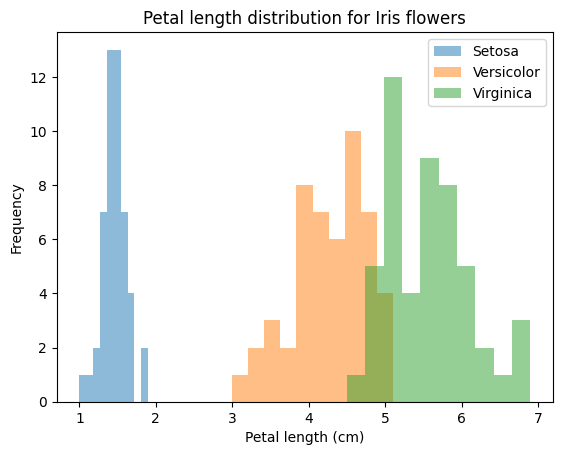

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset (this part requires the Seaborn library):
iris = sns.load_dataset('iris')
setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal_length = iris[iris['species'] == 'virginica']['petal_length']

# Create three histograms, one for each species. Note how each
# plot is automatically assigned a different color:
plt.hist(setosa_petal_length, bins=10, alpha=0.5, label='Setosa')
plt.hist(versicolor_petal_length, bins=10, alpha=0.5, label='Versicolor')
plt.hist(virginica_petal_length, bins=10, alpha=0.5, label='Virginica')
# Choose labels, set title and generate a legend:
plt.xlabel("Petal length (cm)")
plt.ylabel("Frequency")
plt.title("Petal length distribution for Iris flowers")
plt.legend()
plt.show()    # Display the plot.

## $ \S 6 $ Visualizing the 3D-graph of a function of two real variables

Suppose that we would like to visualize the graph of the function
$$ 
f(x, y) = x^3 - 3xy^2\,.
$$
Again, this can easily be accomplished using Matplotlib, this time with the help
of the `mpl_toolkits` library for 3d plotting.

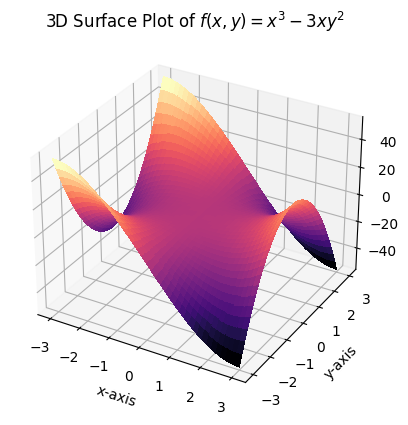

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


f = lambda x, y: x**3 - 3 * x * y**2     # Define the function.
# Generate the x and y values in the range of -3 to 3 with 101 points
xs = np.linspace(-3, 3, 201)
ys = np.linspace(-3, 3, 201)
# Create a meshgrid using the generated x and y values.
X, Y = np.meshgrid(xs, ys)
# X is a matrix having len(ys) lines, each of whose lines equals xs. Similarly,
# Y is a matrix having len(xs) columns, each of which consists of a copy of ys.

# Calculate the z values for each (x, y) pair using the function f:
Z = f(X, Y)

fig = plt.figure()    # Create a figure.
# Add a 3D subplot to the figure:
ax = fig.add_subplot(111, projection="3d")
# Plot a 3D surface using the x, y, and z values, and set the colormap to "magma":
ax.plot_surface(X, Y, Z, cmap="magma", linewidth=0, antialiased=False)
# Set labels for the x-axis, y-axis, and z-axis:
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
# Set the title for the plot:
ax.set_title("3D Surface Plot of $ f(x, y) = x^3 - 3xy^2 $")

plt.show()     # Display the plot.


📝 For two input arrays `xs` and `ys` of dimensions $ (m,) $ and $ (n,) $,
respectively, `meshgrid(xs, ys)` returns two $ 2 $-dimensional arrays `X` and
`Y`, both of dimensions $ (n, m) $. Each of the $ n $ lines of `X` consists
of a copy of `xs`. Similarly, each of the $ m $ columns of `Y` consists of
a copy of `ys` (transposed).`meshgrid` is often used in combination with
functions that operate on arrays of coordinates, such as when evaluating a
function over points in a grid for generating contour or surface plots.

__Example:__

In [1]:
import numpy as np


xs = np.array([0, 1, 2])
ys = np.array([30, 40])

X, Y = np.meshgrid(xs, ys)
print(X)
print(Y)


[[0 1 2]
 [0 1 2]]
[[30 30 30]
 [40 40 40]]


__Exercise:__ Create and customize visualizations of the following surfaces using Matplotlib:

(a) The graph of the function $ h(x, y) = (x^2 - y^2)\sin(x)\cos(2\,y) $ for
$ x \in [-2\pi,2\pi] $ and $ y \in [-\pi, \pi] $. Customize the plot by setting
the `colormap` to `jet`, adding axis labels, and
including a title. 

(b) The graph of the function $ g(x, y) = \sin\big(\sqrt{x^2 + y^2}\,\big) $
for $ x $ and $ y $ in the range $ [-10, 10] $. Customize the plot by setting the
`colormap` to `coolwarm`, adding labels to the axes, and including a title.


## $ \S 7 $ Visualizing the contour plot of a surface

A __contour plot__ is a 2D representation of a 3D surface that displays contour
lines for different values of the function.

__Example:__ Let us visualize a contour plot of the surface given by the graph
of the function 
$$
    g(x, y) = x\,\exp\big(-x^2 - y^2\big)\,.
$$

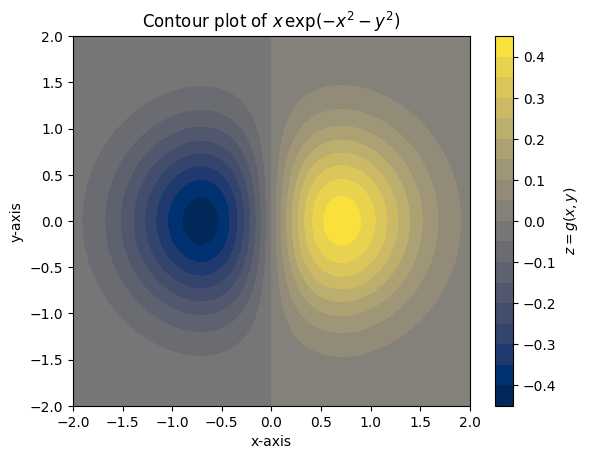

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Define g:
g = lambda x, y: x * np.exp(-x**2 - y**2)
# Generate the x and y values in the range of -2 to 2 with 101 points:
x = np.linspace(-2, 2, 101) 
y = np.linspace(-2, 2, 101)
# Create a meshgrid using the generated x and y values:
x, y = np.meshgrid(x, y)
# Calculate the z values for each x, y pair using g:
z = g(x, y)

plt.contourf(x, y, z, levels=20, cmap='cividis')
# By increasing (decreasing) the number of levels we can obtain
# a finer (resp. coarser) plot.
plt.xlabel("x-axis")       # Labeling the x-axis.
plt.ylabel("y-axis")       # Labeling the y-axis.
# Setting a title:
plt.title("Contour plot of $ x\,\exp(-x^2 - y^2) $")
plt.colorbar(label="$ z = g(x, y) $")       # Labeling the color bar.
plt.show()    # Display the plot.


__Exercise:__ Customize and visualize the contour plots of the following functions:

(a) The function $ f(x, y) = (1 - x / 2 + x^5 + y^3) \exp(-x^2 - y^2) $ for $ x
\in [-2, 2] $ and $ y \in [-3, 3] $.  Customize the plot by using $ 50 $
contour levels, adding axis labels, and including a title. Set the colormap to
`viridis`. Additionally, add a colorbar to display the color scale.

(b) Visualize the contour plot of the Mexican Hat function (also known as the
Ricker wavelet):
$$
    h(x, y) = \big[1 - (x^2 + y^2)\big] \exp\bigg(-\frac{x^2 + y^2}{2}\bigg)
$$
for $ x,\, y $ in the range $ [-3, 3] $.  Customize the plot by using $ 30 $
contour levels, adding axis labels, and including a title.  Further, add a
colorbar to display the color scale and use the `coolwarm` colormap.
